In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:VOF.L.csv", index_col="Date", parse_dates=["Date"])

In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,272.0,275.000000,272.000000,273.25,233.939148,170046
2017-01-04,272.0,275.000000,272.000000,272.75,233.511093,107823
2017-01-05,272.0,274.500000,270.250000,272.50,233.297043,391623
2017-01-06,272.5,273.750000,266.000000,273.00,233.725098,464329
2017-01-09,273.0,273.500000,270.000000,273.50,234.153183,276108
...,...,...,...,...,...,...
2022-03-25,502.0,507.000000,502.000000,507.00,493.078217,265108
2022-03-28,502.0,511.000000,502.000000,506.00,492.105652,115303
2022-03-29,502.0,520.000000,500.000000,518.00,503.776154,149574


In [4]:
import matplotlib.dates as mdates
target_column = ["Close"]
dataset = pd.DataFrame(df[target_column])
print(' Count row of data: ',len(dataset))

 Count row of data:  1328


Text(0.5, 1.0, 'VNC stock closing price')

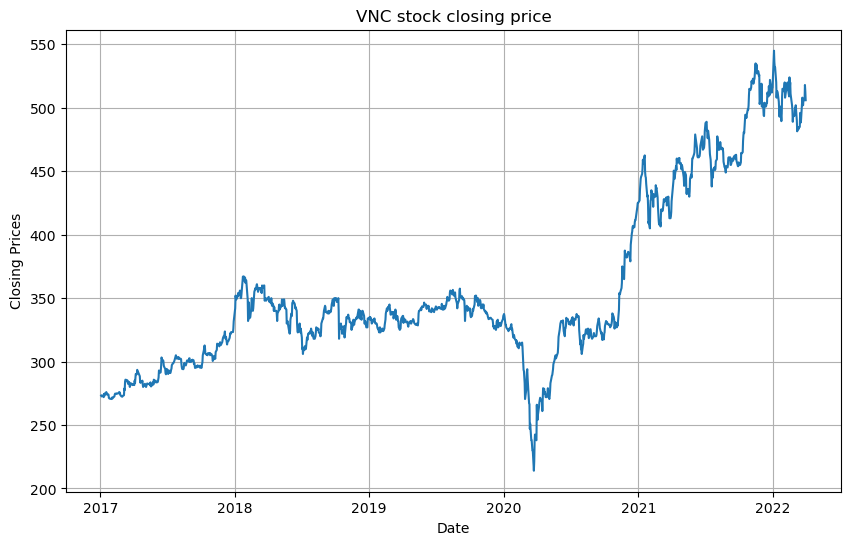

In [5]:
df_close = df['Close']

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(df_close)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('VNC stock closing price')

In [6]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, Flatten
from keras.layers import ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [7]:
from sklearn.preprocessing import MinMaxScaler
dataset_norm = dataset.copy()
dataset[['Close']]
scaler = MinMaxScaler()
dataset_norm['Close'] = scaler.fit_transform(dataset[['Close']])
dataset_norm

,Close
Date,
2017-01-03,0.179003
2017-01-04,0.177492
2017-01-05,0.176737
2017-01-06,0.178248
2017-01-09,0.179758
...,...
2022-03-25,0.885196
2022-03-28,0.882175
2022-03-29,0.918429


In [8]:
totaldata = dataset.values
totaldatatrain = int(len(totaldata)*0.7)
totaldatatest = int(len(totaldata)*0.3)
training_set = dataset_norm[0:totaldatatrain]
test_set = dataset_norm[totaldatatrain:]

In [9]:
def create_sliding_windows(data,len_data,lag):
 x=[]
 y=[]
 for i in range(lag,len_data):
  x.append(data[i-lag:i,0])
  y.append(data[i,0]) 
 return np.array(x),np.array(y)

In [10]:
array_training_set = np.array(training_set)
array_test_set = np.array(test_set)

In [11]:
lag = 2

In [12]:
x_train, y_train = create_sliding_windows(array_training_set,len(array_training_set), lag)

In [13]:
x_test,y_test = create_sliding_windows(array_test_set,len(array_test_set), lag)

In [14]:
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, 
random_state=100)
model_rf.fit(x_train, y_train) 
pred_train_rf= model_rf.predict(x_train)
pred_test_rf = model_rf.predict(x_test)

In [15]:
set_test = dataset["Close"]

In [16]:
set_test

Date
2017-01-03    273.25
2017-01-04    272.75
2017-01-05    272.50
2017-01-06    273.00
2017-01-09    273.50
               ...  
2022-03-25    507.00
2022-03-28    506.00
2022-03-29    518.00
2022-03-30    513.00
2022-03-31    506.00
Name: Close, Length: 1328, dtype: float64

In [18]:
datacompare = pd.DataFrame()
datatest=np.array(set_test[totaldatatrain+lag:])

In [23]:
y_pred_invert_norm = scaler.inverse_transform(pred_test_rf.reshape(397, 1))

In [24]:
datacompare = pd.DataFrame()
datatest=np.array(set_test[totaldatatrain+lag:])
datapred= y_pred_invert_norm

In [25]:
datacompare['Data Test'] = datatest
datacompare['Prediction Results'] = datapred
datacompare

,Data Test,Prediction Results
0,320.0,322.453971
1,321.0,322.453971
2,324.0,320.812638
3,328.0,326.757324
4,332.5,322.577000
...,...,...
392,507.0,365.674000
393,506.0,365.674000
394,518.0,365.674000
395,513.0,365.674000


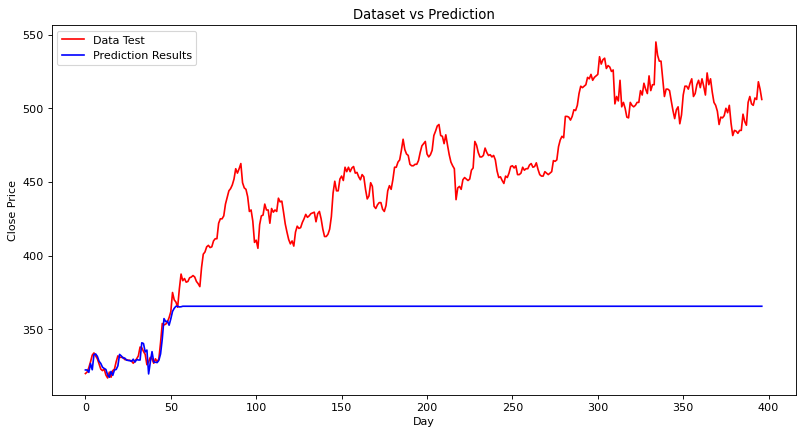

In [26]:
plt.figure(num=None, figsize=(12, 6), dpi=80,facecolor='w', 
edgecolor='k')
plt.title('Dataset vs Prediction')
plt.plot(datacompare['Data Test'], color='red',label='Data Test')
plt.plot(datacompare['Prediction Results'], 
color='blue',label='Prediction Results')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
mse =  mean_squared_error((y_test), pred_test_rf)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error((y_test), pred_test_rf)
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  0.2996491346010612
MAPE:  33.31725540660272


In [28]:
totaldata = dataset.values
totaldatatrain = int(len(totaldata)*0.8)
totaldatatest = int(len(totaldata)*0.2)
training_set = dataset_norm[0:totaldatatrain]
test_set = dataset_norm[totaldatatrain:]

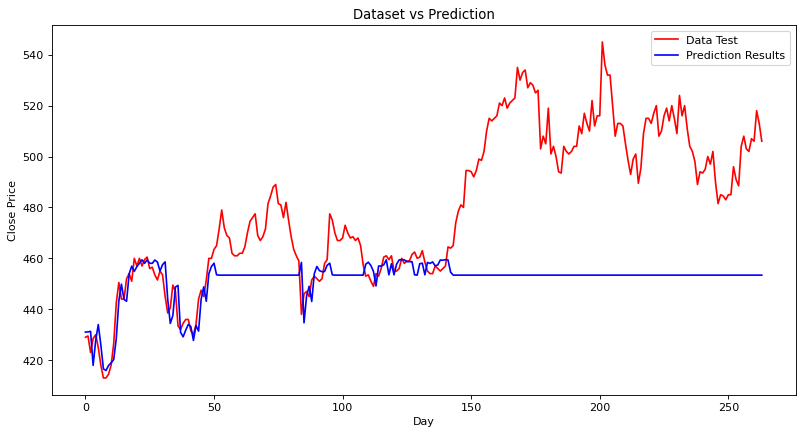

In [33]:
lag = 2
def create_sliding_windows(data,len_data,lag):
 x=[]
 y=[]
 for i in range(lag,len_data):
  x.append(data[i-lag:i,0])
  y.append(data[i,0]) 
 return np.array(x),np.array(y)
array_training_set = np.array(training_set)
array_test_set = np.array(test_set)
x_train, y_train = create_sliding_windows(array_training_set,len(array_training_set), lag)
x_test,y_test = create_sliding_windows(array_test_set,len(array_test_set), lag)
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, 
random_state=100)
model_rf.fit(x_train, y_train) 
pred_train_rf= model_rf.predict(x_train)
pred_test_rf = model_rf.predict(x_test)
set_test = dataset["Close"]
set_test
y_pred_invert_norm = scaler.inverse_transform(pred_test_rf.reshape(264, 1))
datacompare = pd.DataFrame()
datatest=np.array(set_test[totaldatatrain+lag:])
datapred= y_pred_invert_norm
datacompare['Data Test'] = datatest
datacompare['Prediction Results'] = datapred
datacompare
plt.figure(num=None, figsize=(12, 6), dpi=80,facecolor='w', edgecolor='k')
plt.title('Dataset vs Prediction')
plt.plot(datacompare['Data Test'], color='red',label='Data Test')
plt.plot(datacompare['Prediction Results'], 
color='blue',label='Prediction Results')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [34]:
mse =  mean_squared_error((y_test), pred_test_rf)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error((y_test), pred_test_rf)
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  0.11705936866541886
MAPE:  10.216799468481742


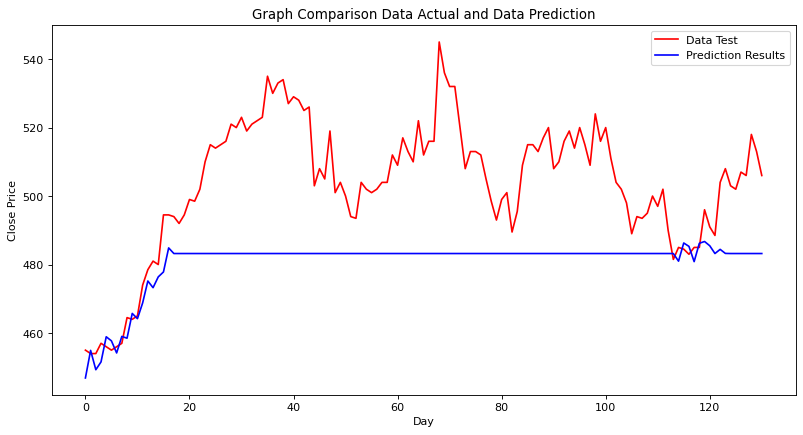

In [36]:
totaldata = dataset.values
totaldatatrain = int(len(totaldata)*0.9)
totaldatatest = int(len(totaldata)*0.1)
training_set = dataset_norm[0:totaldatatrain]
test_set = dataset_norm[totaldatatrain:]
lag = 2
def create_sliding_windows(data,len_data,lag):
 x=[]
 y=[]
 for i in range(lag,len_data):
  x.append(data[i-lag:i,0])
  y.append(data[i,0]) 
 return np.array(x),np.array(y)
array_training_set = np.array(training_set)
array_test_set = np.array(test_set)
x_train, y_train = create_sliding_windows(array_training_set,len(array_training_set), lag)
x_test,y_test = create_sliding_windows(array_test_set,len(array_test_set), lag)
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, 
random_state=100)
model_rf.fit(x_train, y_train) 
pred_train_rf= model_rf.predict(x_train)
pred_test_rf = model_rf.predict(x_test)
set_test = dataset["Close"]
set_test
y_pred_invert_norm = scaler.inverse_transform(pred_test_rf.reshape(131, 1))
datacompare = pd.DataFrame()
datatest=np.array(set_test[totaldatatrain+lag:])
datapred= y_pred_invert_norm
datacompare['Data Test'] = datatest
datacompare['Prediction Results'] = datapred
datacompare
plt.figure(num=None, figsize=(12, 6), dpi=80,facecolor='w', edgecolor='k')
plt.title('Graph Comparison Data Actual and Data Prediction')
plt.plot(datacompare['Data Test'], color='red',label='Data Test')
plt.plot(datacompare['Prediction Results'], 
color='blue',label='Prediction Results')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [37]:
mse =  mean_squared_error((y_test), pred_test_rf)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error((y_test), pred_test_rf)
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  0.08148042058449322
MAPE:  7.6709892136625175
